In [1]:
%config IPCompleter.greedy=True
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [2]:
carData = pd.read_csv('DeepNetData/Auto.csv')
#print(carData.loc[carData['horsepower'] == '?'])
carData = carData.loc[carData['horsepower'] != '?']
#pd.options.display.max_rows = 400
#print(carData)

carData[['horsepower']] = carData[['horsepower']].astype('int32')
carData[['origin']] = carData[['origin']].astype('object')

carData[['weight']] = carData[['weight']] - carData[['weight']].mean()
carData[['weight']] = carData[['weight']] / carData[['weight']].std()

carData[['year']] = carData[['year']] - carData[['year']].mean()
carData[['year']] = carData[['year']] / carData[['year']].std()

carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int32
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null float64
origin          392 non-null object
name            392 non-null object
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 29.1+ KB


In [3]:
carData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,0.619748,12.0,-1.623241,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,0.842258,11.5,-1.623241,1,buick skylark 320
2,18.0,8,318.0,150,0.539692,11.0,-1.623241,1,plymouth satellite
3,16.0,8,304.0,150,0.536160,12.0,-1.623241,1,amc rebel sst
4,17.0,8,302.0,140,0.554997,10.5,-1.623241,1,ford torino


In [4]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int32
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null float64
origin          392 non-null object
name            392 non-null object
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 29.1+ KB


In [5]:
carData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,3.920000e+02,392.000000,3.920000e+02
mean,23.445918,5.471939,194.411990,104.469388,3.625218e-17,15.541327,-1.232574e-15
std,7.805007,1.705783,104.644004,38.491160,1.000000e+00,2.758864,1.000000e+00
min,9.000000,3.000000,68.000000,46.000000,-1.606522e+00,8.000000,-1.623241e+00
25%,17.000000,4.000000,105.000000,75.000000,-8.857216e-01,13.775000,-8.088504e-01
50%,22.750000,4.000000,151.000000,93.500000,-2.049490e-01,15.500000,5.540071e-03
75%,29.000000,8.000000,275.750000,126.000000,7.501341e-01,17.025000,8.199306e-01
max,46.600000,8.000000,455.000000,230.000000,2.545808e+00,24.800000,1.634321e+00


In [6]:
from sklearn.model_selection import train_test_split

carData.drop(columns = ['name'], axis = 1)

train, test = train_test_split(carData, train_size=0.7 ,test_size = 0.3, random_state=100)
print('train size: ', train.shape)
print('test size: ', test.shape)

train size:  (274, 9)
test size:  (118, 9)


In [7]:
y_train, X_train = dmatrices('mpg ~ horsepower', data=train, return_type='dataframe')
y_test, X_test = dmatrices('mpg ~ horsepower', data=test, return_type='dataframe')

In [8]:
mod = sm.OLS(y_train, X_train)    # Describe model
res = mod.fit()
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     488.6
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           1.11e-62
Time:                        18:38:06   Log-Likelihood:                -818.21
No. Observations:                 274   AIC:                             1640.
Df Residuals:                     272   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.7649      0.829     49.147      0.0

In [9]:
y_pred = res.predict(X_test)

MSE:  26.59241561571674


Text(0, 0.5, 'mpg')

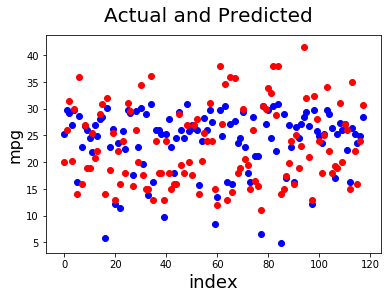

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

print('MSE: ', mean_squared_error(y_pred, y_test))
c = [i for i in range(0, y_pred.shape[0])]
fig = plt.figure()

plt.scatter(c, y_pred, color="blue")
plt.scatter(c, y_test, color="red")

#plt.plot(c, y_pred,
#         color="blue", linewidth=1.5)#, linestyle="-")     #Plotting Actual
#plt.plot(c, y_test,
#        color="red",  linewidth=1.5)#, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                               # X-label
plt.ylabel('mpg', fontsize=16)



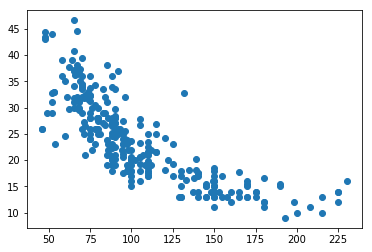

In [11]:
import numpy as np

plt.scatter(X_train['horsepower'], y_train)

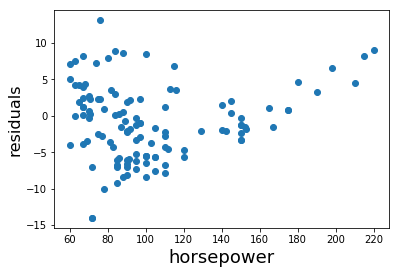

In [12]:
plt.xlabel('horsepower', fontsize=18)                               # X-label
plt.ylabel('residuals', fontsize=16)
plt.scatter(X_test['horsepower'], y_test['mpg'] - y_pred)

(392, 9)

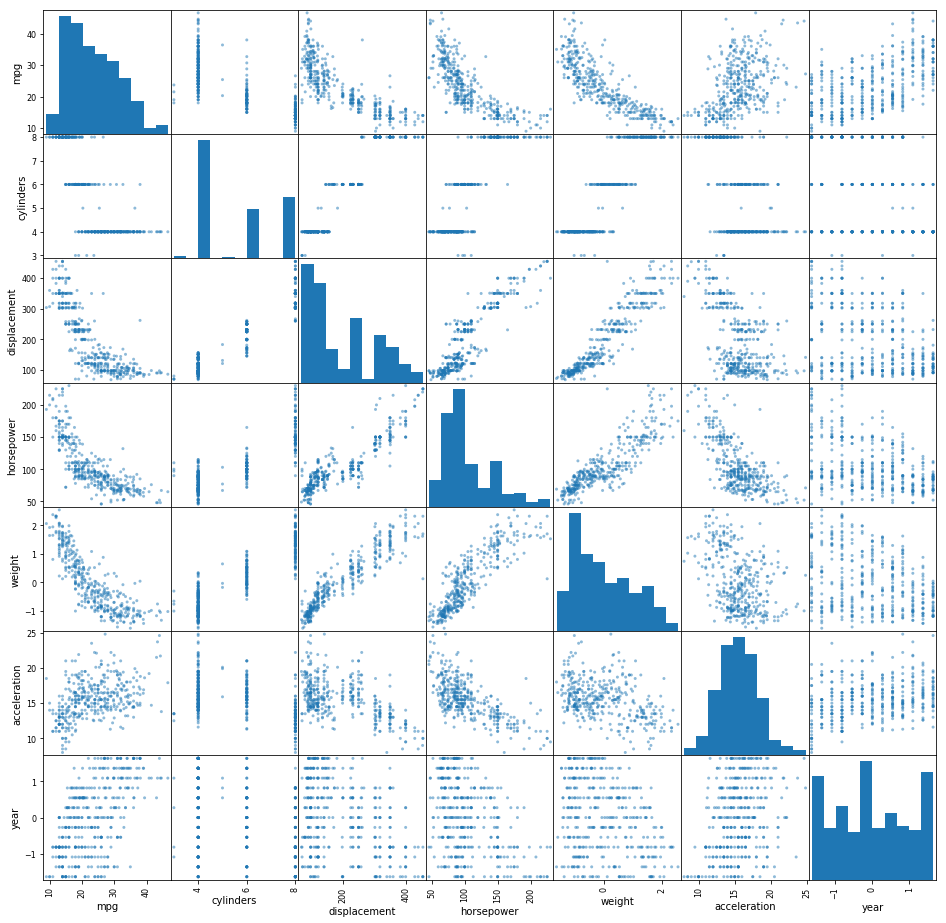

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(carData, figsize=(16,16))
carData.shape

In [14]:
carData.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [15]:
y_train, X_train = dmatrices('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
                             , data=train, return_type='dataframe')
y_test, X_test = dmatrices('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
                             , data=test, return_type='dataframe')
res_mod2 = sm.OLS(y_train, X_train).fit()
y_pred = res_mod2.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod2.summary())

MSE:  10.165380942704251
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     157.6
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           4.12e-96
Time:                        18:38:10   Log-Likelihood:                -719.23
No. Observations:                 274   AIC:                             1456.
Df Residuals:                     265   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.2268

In [16]:
#X_train = X_train.drop(columns = ['cylinders'], axis = 1)
#X_test = X_test.drop(columns = ['cylinders'], axis = 1)

res_mod = sm.OLS(y_train, X_train).fit()
y_pred = res_mod.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod.summary())

MSE:  10.165380942704251
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     157.6
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           4.12e-96
Time:                        18:38:10   Log-Likelihood:                -719.23
No. Observations:                 274   AIC:                             1456.
Df Residuals:                     265   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.2268

In [17]:
X_train = X_train.drop(columns = ['displacement'], axis = 1)
X_test = X_test.drop(columns = ['displacement'], axis = 1)

res_mod = sm.OLS(y_train, X_train).fit()
y_pred = res_mod.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod.summary())

MSE:  10.151790668620245
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           2.30e-95
Time:                        18:38:10   Log-Likelihood:                -723.74
No. Observations:                 274   AIC:                             1463.
Df Residuals:                     266   BIC:                             1492.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.4686

In [18]:
X_train = X_train.drop(columns = ['acceleration'], axis = 1)
X_test = X_test.drop(columns = ['acceleration'], axis = 1)

res_mod = sm.OLS(y_train, X_train).fit()
y_pred = res_mod.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod.summary())

MSE:  10.003971699880394
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           2.56e-96
Time:                        18:38:10   Log-Likelihood:                -724.25
No. Observations:                 274   AIC:                             1463.
Df Residuals:                     267   BIC:                             1488.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      23.6687   

In [19]:
X_train.corr()

,Intercept,origin[T.2],origin[T.3],cylinders,horsepower,weight,year
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin[T.2],NaN,1.000000,-0.232218,-0.345338,-0.292085,-0.285151,-0.027606
origin[T.3],NaN,-0.232218,1.000000,-0.416031,-0.353047,-0.460850,0.238766
cylinders,NaN,-0.345338,-0.416031,1.000000,0.856637,0.899549,-0.378395
horsepower,NaN,-0.292085,-0.353047,0.856637,1.000000,0.881152,-0.418589
weight,NaN,-0.285151,-0.460850,0.899549,0.881152,1.000000,-0.324694
year,NaN,-0.027606,0.238766,-0.378395,-0.418589,-0.324694,1.000000


In [20]:
X_train = X_train.drop(columns = ['horsepower'], axis = 1)
X_test = X_test.drop(columns = ['horsepower'], axis = 1)

res_mod = sm.OLS(y_train, X_train).fit()
y_pred = res_mod.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod.summary())

MSE:  9.179179589594794
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           2.39e-96
Time:                        18:38:10   Log-Likelihood:                -727.05
No. Observations:                 274   AIC:                             1466.
Df Residuals:                     268   BIC:                             1488.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.6588    

In [21]:
y_train, X_train = dmatrices('mpg ~ weight + I(weight**2) + year + origin'
                             , data=train, return_type='dataframe')
y_test, X_test = dmatrices('mpg ~ weight + I(weight**2) + year + origin'
                             , data=test, return_type='dataframe')
res_mod2 = sm.OLS(y_train, X_train).fit()
y_pred = res_mod2.predict(X_test)

print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod2.summary())

MSE:  7.379445106496851
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     306.1
Date:                Sun, 21 Oct 2018   Prob (F-statistic):          1.50e-108
Time:                        18:38:10   Log-Likelihood:                -698.27
No. Observations:                 274   AIC:                             1409.
Df Residuals:                     268   BIC:                             1430.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         21

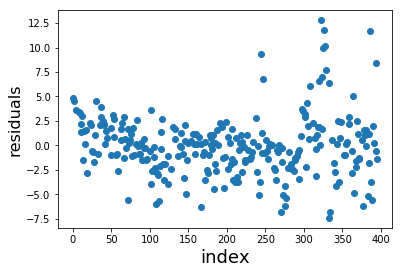

In [22]:
plt.xlabel('index', fontsize=18)                               # X-label
plt.ylabel('residuals', fontsize=16)
#plt.scatter(np.arange(y_pred.shape[0]), y_test['mpg'] - y_pred)
y_pred = res_mod2.predict(X_train)
plt.scatter(y_pred.index, y_train['mpg'] - y_pred)

In [23]:
y_out = y_train[np.abs(y_train['mpg'] - res_mod2.predict(X_train)) > 9.5]
print(list(y_out.index.values))

[326, 322, 386, 327, 325]


In [24]:
#drop outliers
y_train = y_train.drop(index = y_out.index, axis = 0)
X_train = X_train.drop(index = y_out.index, axis = 0)
y_train.info()

#just to be sure they are dropped
y_out = y_train[np.abs(y_train['mpg'] - res_mod2.predict(X_train)) > 9.5]
print(list(y_out.index.values))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 171 to 8
Data columns (total 1 columns):
mpg    269 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB
[]


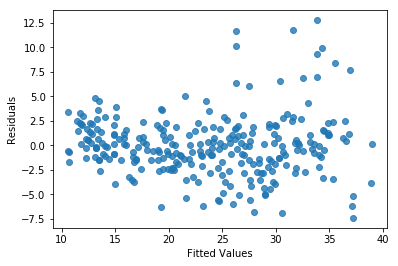

In [25]:
import seaborn as sns

fitted_values = pd.Series(res_mod2.fittedvalues, name="Fitted Values")
residuals = pd.Series(res_mod2.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

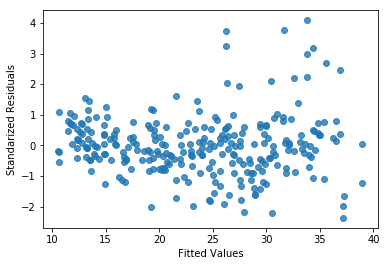

In [26]:
s_residuals = pd.Series(res_mod2.resid_pearson, name="Standarized Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

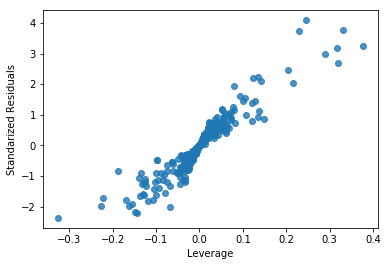

In [27]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(res_mod2).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

#y_out = y_train[y_train[leverage > 0.3]]
#y_train = y_train.drop(index = list(leverage.index), axis = 0)
#X_train = X_train.drop(index = list(leverage.index), axis = 0)

In [28]:
res_mod2 = sm.OLS(y_train, X_train).fit()
y_pred = res_mod2.predict(X_test)

print('MSE: ', mean_squared_error(y_pred, y_test))
print(res_mod2.summary())

MSE:  7.512517957630773
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     378.4
Date:                Sun, 21 Oct 2018   Prob (F-statistic):          7.05e-118
Time:                        18:38:12   Log-Likelihood:                -647.04
No. Observations:                 269   AIC:                             1306.
Df Residuals:                     263   BIC:                             1328.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         21